In [ ]:
%%shell
jupyter nbconvert --to html /content/Final_Project_Bopst_Wong.ipynb

[NbConvertApp] Converting notebook /content/Final_Project_Bopst_Wong.ipynb to html
[NbConvertApp] Writing 1213395 bytes to /content/Final_Project_Bopst_Wong.html


# An Evaluation of Apartmnets and Rent

Spring 2024 Data Science Project

Marcus Wong and Connor Bopst


Contribution Checkpoints:

A: Project idea - 5%
B: Dataset Curation and Preprocessing - 10%
C: Data Exploration and Summary Statistics - 10%
D: ML Algorithm Design/Development - 25%
E: ML Algorithm Training and Test Data Analysis - 20%
F: Visualization, Result Analysis, Conclusion - 15%
G: Final Tutorial Report Creation - 10%
H: Additional (not listed above, if any) - 5%

Member 1: Marcus Wong, Contribution: 95% (did not contribute to H).

Member 2: Connor Bopst, Contribution: 95% (did not contribute to H).

Member 3: Lazy Bunny, Contribution: 80% (did not contribute to E).

"We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial."

Marcus Wong 5/7/2024

Connor Bopst 5/7/2024

Connor Bopst - Proposed the idea of using the apartments dataset as well as cleaned up the data and make the plots with the maps. Also did the heat map.

Marcus Wong - Wrote the introduction, conclusion, pushed the web page to the git repository. Did the scatter plots as well as the linear regression model.

Introduction:
In the United States, few economic factors are as ubiquitous to everyone as the cost of rent. It's a metric that not only reflects economic vitality but also holds important implications for individuals and families across the nation.

In this evaluation, we look to see what factors have an affect on rent prices and look at especially at how location affects the price of rent. It is important that we look at what affects rent because rent affordability directly impacts individuals and families, influencing their quality of life, financial stability, and even economic mobility.

We have a dataset with 10k observations of rent listings obtained from the UCI ML dataset repository. We plan to use this data to train a model that will predict rent prices. It contains 22 features, including bedrooms, bathrooms, latitude and longitude, square feet, and some text fields such as 'amenities' and 'body' of the listing.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import sklearn as sk
import keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
#from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Dataset Source: https://www.kaggle.com/datasets/adithyaawati/apartments-for-rent-classified

Data Curation:
This is a dataset of classified for apartments for rent in USA from various rental listing agency platforms.
The dataset contains both 10,000 rental entries and 22 columns.

In [ ]:
df = pd.read_table("apartments_for_rent_classified_10K.csv", delimiter = ';', encoding= 'ISO-8859-1', low_memory=False)

In [ ]:
df.head()

,id,category,title,body,bathrooms,bedrooms,currency,fee,has_photo,price,...,price_type,square_feet,cityname,state,latitude,longitude,source,time,city_state,geometry
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",1.0,0.0,USD,No,Thumbnail,1390,...,Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410,"Arlington, VA",POINT (-77.0816 38.891)
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",1.0,0.0,USD,No,Thumbnail,925,...,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743,"Seattle, WA",POINT (-122.3275 47.616)
5,5667891676,housing/rent/apartment,0 BR in New York NY 10019,**RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVA...,1.0,0.0,USD,No,Thumbnail,2475,...,Monthly,130,Manhattan,NY,40.7629,-73.9885,Listanza,1577289784,"Manhattan, NY",POINT (-73.9885 40.7629)
8,5668610290,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",1.0,0.0,USD,No,Thumbnail,1495,...,Monthly,138,San Francisco,CA,37.7599,-122.4379,RentLingo,1577358313,"San Francisco, CA",POINT (-122.4379 37.7599)
14,5664571820,housing/rent/apartment,Studio apartment 57 Taylor Street,"This unit is located at 57 Taylor Street, San ...",1.0,0.0,USD,No,Thumbnail,1695,...,Monthly,190,San Francisco,CA,37.7599,-122.4379,RentLingo,1577015121,"San Francisco, CA",POINT (-122.4379 37.7599)


In [ ]:
df.dtypes

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price              int64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

One thing we will look into is the time dimension to the data. It is stored as an integer currently. However, we will disregard it for now and treat our data as a cross-section. We will explore adding time back later.

In [ ]:
# Here we check for any missing values
def missval(s):
  num = df[s].isnull().sum()
  print('there are ' + str(num) + ' missing values in ' + str(s))

for i in df.columns:
  missval(i)

there are 0 missing values in id
there are 0 missing values in category
there are 0 missing values in title
there are 0 missing values in body
there are 3549 missing values in amenities
there are 34 missing values in bathrooms
there are 7 missing values in bedrooms
there are 0 missing values in currency
there are 0 missing values in fee
there are 0 missing values in has_photo
there are 4163 missing values in pets_allowed
there are 0 missing values in price
there are 0 missing values in price_display
there are 0 missing values in price_type
there are 0 missing values in square_feet
there are 3327 missing values in address
there are 77 missing values in cityname
there are 77 missing values in state
there are 10 missing values in latitude
there are 10 missing values in longitude
there are 0 missing values in source
there are 0 missing values in time


There are missing values in amenities, bedrooms, bathrooms, pets_allowed, address, cityname, state, latitude, longitude, city_state. There are many missing values in amenities, address, and pets_allowed, but the other features have very few missing values. Thus we drop the features amenities, address, and pets_allowed, and drop the remaining rows with missing values using dropna.

In [ ]:
df = df.drop(columns= ['address', 'pets_allowed', 'amenities'])
df = df.dropna()
for i in df.columns:
  missval(i)

there are 0 missing values in id
there are 0 missing values in category
there are 0 missing values in title
there are 0 missing values in body
there are 0 missing values in bathrooms
there are 0 missing values in bedrooms
there are 0 missing values in currency
there are 0 missing values in fee
there are 0 missing values in has_photo
there are 0 missing values in price
there are 0 missing values in price_display
there are 0 missing values in price_type
there are 0 missing values in square_feet
there are 0 missing values in cityname
there are 0 missing values in state
there are 0 missing values in latitude
there are 0 missing values in longitude
there are 0 missing values in source
there are 0 missing values in time


We see now that we have no missing values.

the most important features in our dataset are bedrooms, bathrooms, square_feet, cityname, and state. These are the most important features for predicting rental cost.

<Axes: >

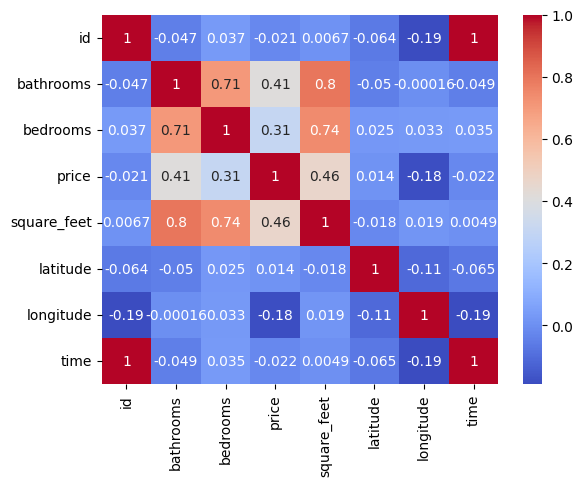

In [ ]:
# Here we do some EDA with the corrplot to look for initial correlations
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

This correlation plot shows correlations between our numeric features. We see the most interesting results in the middle of the plot. Square feet and bedrooms have a correlation coefficient of 0.7, meaning they are positively correlated. The features most strongly correlated with price (the best predictors) are square feet, bathrooms, and bedrooms, in that order. We will be sure to include these in our model.

In [ ]:
#we add a variable to create a city and state geographic variable called city_state
df['city_state'] = df['cityname'] + ', ' + df['state']

In [ ]:
len(df['city_state'].unique())

1767

We added a categorical variable called city_state to see the city-state pairs that our data are in. This also differentiates between cities that have the same name but are in different states. This will give us more insight into where the data are from and will be useful in our model. We see that there are 3,556 unique city-state pairs in our dataset.

Where are our data located? We want to show a distribution of our data across the US so we will use geopandas along with our latitude and longitude data.

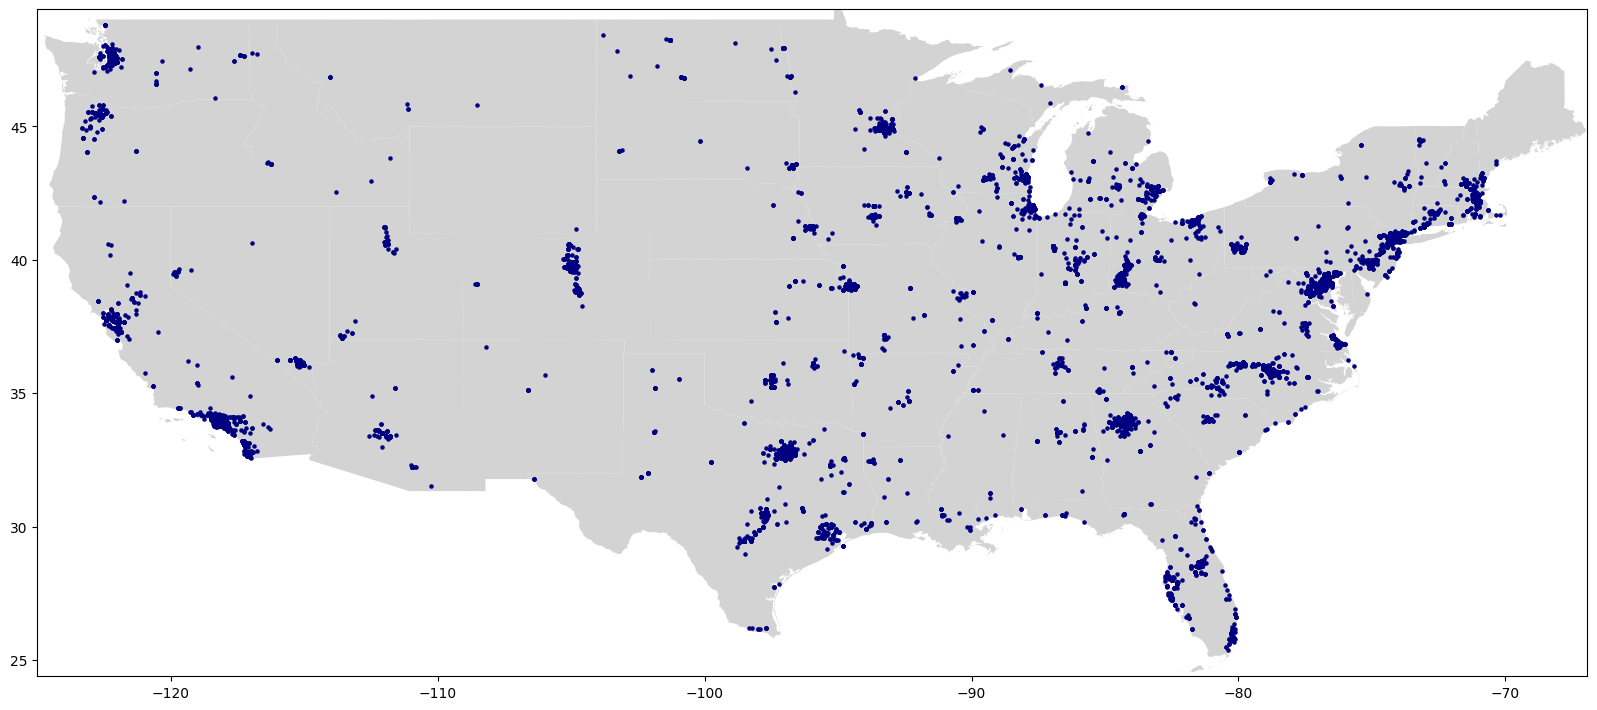

In [ ]:
df['geometry'] = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Here we read in the necessary shape file
shape = gpd.read_file('cb_2018_us_state_500k.shp')

# now we make our plot
fig, ax = plt.subplots(figsize = (20,20))
shape.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, marker='o', color='navy', markersize=5)
ax.set_xlim([-125.0, -66.93457]) # these limits are the latitude and longitude limits of the continental US
ax.set_ylim([24.396308, 49.384358])
plt.show()

We see that our data density is pretty concentrated along the coasts, and especially the northeast. Note that Alaska and Hawaii are omitted from our analysis here. Our observations are also clustered in urban population centers (cities). In the midwest especially, we see clusters of high density and then less dense observations around them. This makes sense since most renters live in cities. This distribution makes us think we may want to focus our model on one region where we have high data density rather than trying to create a model for the whole united states.

In [ ]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.883000e+03,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000,9.883000e+03
mean,5.622910e+09,1.380552,1.747040,1486.954670,943.237580,37.682879,-94.639141,1.574865e+09
std,7.045182e+07,0.616038,0.941714,1078.622808,527.162123,5.516318,15.809754,3.775256e+06
min,5.508654e+09,1.000000,0.000000,200.000000,107.000000,21.315500,-158.022100,1.568744e+09
25%,5.509245e+09,1.000000,1.000000,949.000000,650.000000,33.667900,-101.301700,1.568781e+09
50%,5.668609e+09,1.000000,2.000000,1275.000000,803.000000,38.755500,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.384600,-82.115700,1.577359e+09
max,5.668643e+09,8.500000,9.000000,52500.000000,11318.000000,61.594000,-70.191600,1.577362e+09


Above we see summary statistics for our numeric fields in our data. Notice the large outlier in price - $52,500.

Now we want to try to figure out the distribution of our data. The easiest thing to do is just to plot the frequency distribution of prices!

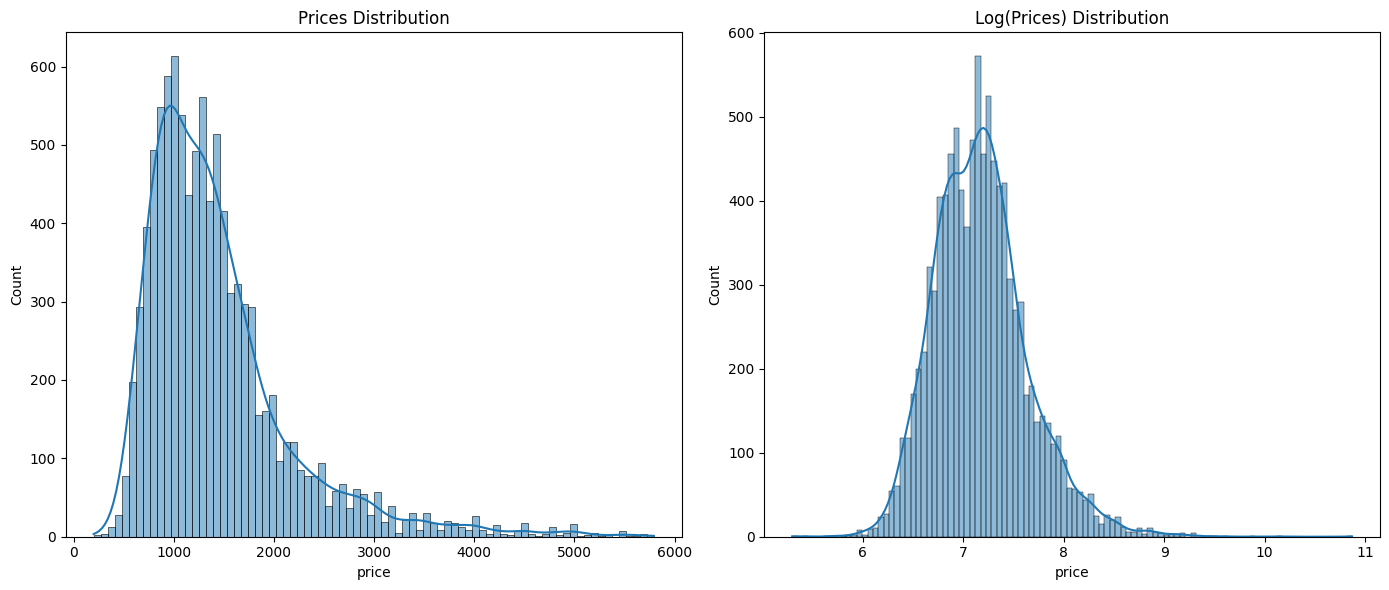

In [ ]:
prices = df['price']
log_prices = np.log(df['price'])
# Here we filter out extreme outliers (price z-score > 4) and render a density plot of the prices in our dataset.
prices_no_outliers = prices.where((np.abs(stats.zscore(prices)) < 4)).dropna()


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(prices_no_outliers, ax=axes[0], kde=True)
axes[0].set_title('Prices Distribution')

sns.histplot(log_prices, ax=axes[1], kde=True)
axes[1].set_title('Log(Prices) Distribution')

plt.tight_layout()
plt.show()

This frequency plot of prices on the left shows us that the distribution of rents is centered around ~$1300 but it has a very long tail. This leads us to believe it may be log-normally distributed. Upon taking the log of the prices and doing a frequency plot, we see that it does indeed look normally distributed, providing evidence that our data may be log-normally distribtued.

Now we look for summary statistics by state:

In [ ]:
summary_table = df.groupby('state').agg(
    observations=('id', 'count'),
    average_price=('price', 'mean'),
    average_bathrooms=('bathrooms', 'mean'),
    average_bedrooms=('bedrooms', 'mean'),
    avg_sqft=('square_feet', 'mean')
).reset_index()

summary_table.sort_values('average_price', ascending = False)

,state,observations,average_price,average_bathrooms,average_bedrooms,avg_sqft
11,HI,12,3689.083333,2.125000,2.666667,1401.000000
4,CA,950,2830.156842,1.465789,1.711579,977.968421
19,MA,166,2386.048193,1.322289,1.837349,957.969880
7,DC,73,2215.684932,1.219178,1.328767,704.493151
39,RI,11,1994.000000,1.545455,2.181818,915.818182
31,NJ,383,1960.227154,1.348564,1.556136,909.971279
21,ME,2,1862.500000,1.250000,1.500000,1069.000000
47,WA,519,1773.772640,1.378613,1.699422,909.400771
26,MT,7,1755.714286,1.571429,2.285714,1554.857143
34,NY,68,1678.558824,1.227941,1.602941,906.441176


Hawaii is the most expensive state for renters on average according to our data. Notice how average bedrooms climbs higher the less densley populated the state is. This is probably because of the higher cost of land in the densley populated states.

Hypothesis Test 1:

Rent for a one-bedroom, one-bathroom apartment is the same price per square foot in Boston as it is in DC.

H_0: The location of Boston vs. DC has no significant effect on the price per square foot of a one bedroom, one bathroom apartment.

H_A: The location of Boston vs. DC has a significant effect on the price per square foot of a one bedroom, one bathroom apartment.

In [ ]:
BO_DC = df[df['city_state'].isin(['Boston, MA', 'Washington, DC']) & (df['bedrooms'] == 1.0) & (df['bathrooms'] == 1.0)]
BO_DC.head()

BO_DC['PPSFT'] = BO_DC['price'] / BO_DC['square_feet']
# Separate PPSFT values into arrays for each city.
boston_ppsft = BO_DC.loc[BO_DC['city_state'] == 'Boston, MA', ['PPSFT']]
washington_ppsft = BO_DC.loc[BO_DC['city_state'] == 'Washington, DC', ['PPSFT']]

t_test_result = stats.ttest_ind(boston_ppsft, washington_ppsft, equal_var=True)

# Print the t-test result (t-statistic and p-value)
print(f't-statistic: {t_test_result.statistic}, p-value: {t_test_result.pvalue}')

t-statistic: [2.0899239], p-value: [0.04257453]


<ipython-input-15-74a41b13038a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BO_DC['PPSFT'] = BO_DC['price'] / BO_DC['square_feet']


Based on the p-value of 0.043 < 0.05, we can reject the null hypothesis that price per square foot of Boston one-bedroom, one-bathroom apartments is the same as a Washington, DC one-bedroom, one-bathroom apartment. Thus we know that the prices are not the same, although we cannot say that one is more expensive than the other.

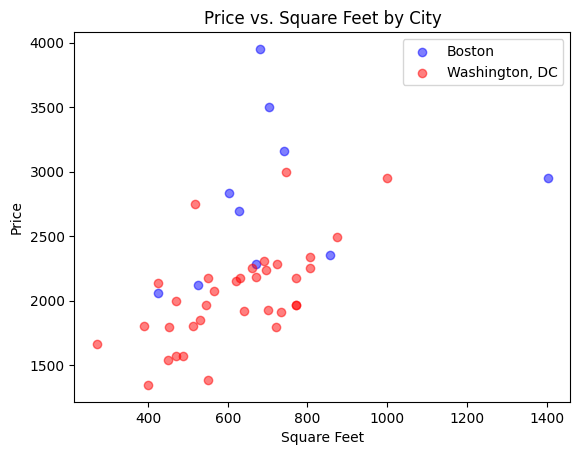

In [ ]:
boston_data = BO_DC.loc[BO_DC['city_state'] == 'Boston, MA', ['price', 'square_feet']]
washington_data = BO_DC.loc[BO_DC['city_state'] == 'Washington, DC', ['price', 'square_feet']]

plt.scatter(boston_data['square_feet'], boston_data['price'], color='blue', alpha=0.5, label='Boston')
plt.scatter(washington_data['square_feet'], washington_data['price'], color='red', alpha=0.5, label='Washington, DC')

plt.title('Price vs. Square Feet by City')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend()
plt.show()

Hypothesis test 2:

Studio apartments in Washington, DC are more expensive than one-bedroom apartments in Baltimore City.

H_0: the mean rent of a Studio in Washington, DC is the same as or less than a one-bedroom apartment in Baltimore city

H_1: the mean rent of a studio in Washington, DC is higher than that of a one-bedroom apartment in Baltimore city


In [ ]:
BA_DC = df[df['city_state'].isin(['Baltimore, MD', 'Washington, DC'])]

baltimore_price = BA_DC.loc[(BA_DC['city_state'] == 'Baltimore, MD') & (BA_DC['bedrooms'] == 1) , ['price']]
washington_price = BA_DC.loc[(BA_DC['city_state'] == 'Washington, DC') & (BA_DC['bedrooms'] == 0), ['price']]

t_test_result = stats.ttest_ind(washington_price, baltimore_price,  equal_var=False)

print(f't-statistic: {t_test_result.statistic}, p-value: {t_test_result.pvalue}')

t-statistic: [2.61811543], p-value: [0.01545977]


We see that the p-value of 0.0003 < 0.025, which is half of our total threshold 0.05, since we are doing a one-tailed test. Since our t-statistic is positive, that means that a one-bedroom apartment in baltimore is cheaper than a studio apartment in Washington, DC on average.

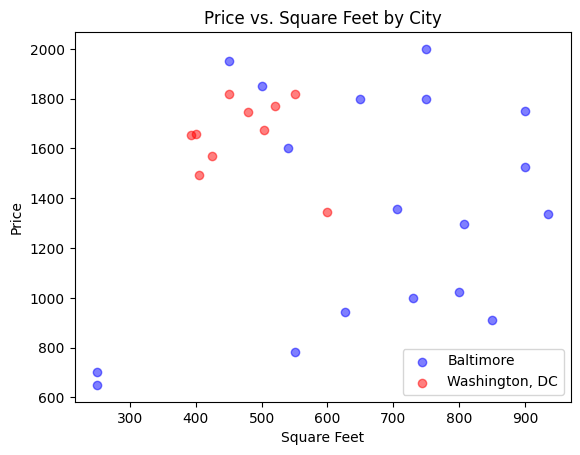

In [ ]:
# Plot Baltimore data
baltimore_data = BA_DC.loc[(BA_DC['city_state'] == 'Baltimore, MD') & (BA_DC['bedrooms'] == 1),['square_feet', 'price']]
washington_data = BA_DC.loc[(BA_DC['city_state'] == 'Washington, DC') & (BA_DC['bedrooms'] == 0),['square_feet', 'price']]

plt.scatter(baltimore_data['square_feet'], baltimore_data['price'], color='blue', alpha=0.5, label='Baltimore')
plt.scatter(washington_data['square_feet'], washington_data['price'], color='red', alpha=0.5, label='Washington, DC')

plt.title('Price vs. Square Feet by City')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend()

# Show plot
plt.show()

Hypothesis Test 2

H_0:  There is no significant difference in the average rental prices of apartments based on the number of bedrooms.

H_A: There is a significant difference in the average rental prices of apartments based on the number of bedrooms.

Test Method: One-way Analysis of Variance (ANOVA)

α = 0.05

In [ ]:
from scipy.stats import f_oneway
grouped_data = df.groupby('bedrooms')
groups = [group[1]['price'] for group in grouped_data]
f_statistic, p_value = f_oneway(*groups)
print("ANOVA p-value:", p_value)

ANOVA p-value: 4.01392683398998e-297


Our P-value is lower than the significance level of 0.05 so we reject the null hypothesis

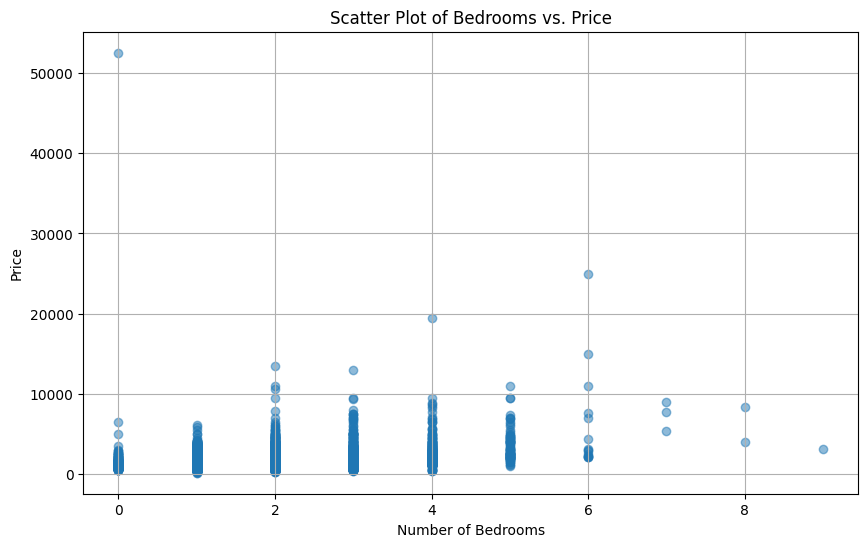

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['bedrooms'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Primary Analysis:
Linear Regression
By training a linear regression model with the square footage as the input feature and the rental price as the target variable, the model learns the relationship between the size of the apartment and its corresponding rental price. Once trained, we can see the relationship between the two variables and also predict the rental price based off of the square footage.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Load the dataset
# Drop rows with missing values in 'square_feet' and 'price' columns
df = df.dropna(subset=['square_feet'])

# Selecting features and target variable
X = df[['square_feet']]  # Feature matrix
y = df['price']          # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 546769.1125129851


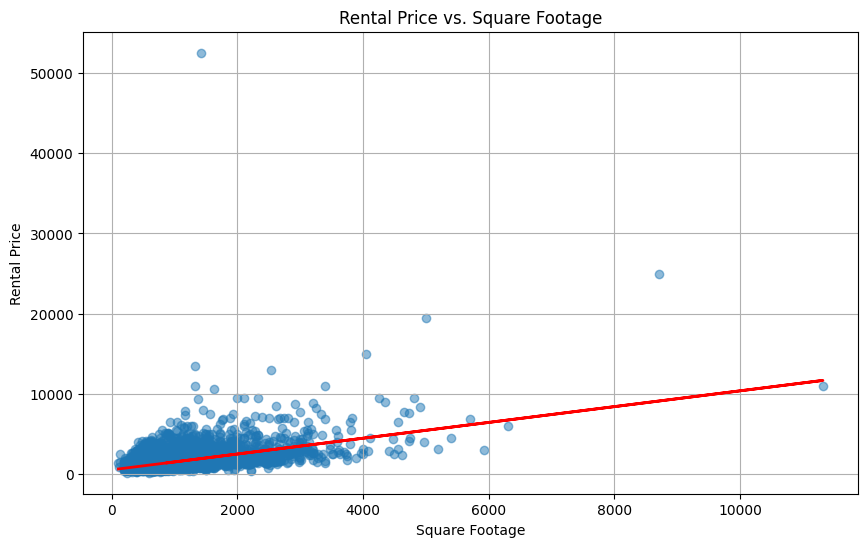

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['square_feet'], df['price'], alpha=0.5)
plt.title('Rental Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Rental Price')
plt.grid(True)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.show()

Here we can see that the two are positively correlated meaning that as the square footage of an apartment goes up, the rent does too.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df1 = df[['price','bathrooms', 'bedrooms', 'square_feet','latitude','longitude','state', 'city_state']].dropna()

df1['state'] = df1['state'].astype('category')
df1['city_state'] = df1['city_state'].astype('category')

df1['price'] = np.log(df1['price'])
# # Define the regression formula
# # Including both city-state and state as fixed effects, and other numerical features
formula = 'price ~ bathrooms + bedrooms + square_feet + latitude + longitude + C(city_state) + C(state)'

# # Fit the fixed effect model
model = smf.ols(formula=formula, data=df1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     22.55
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        06:36:07   Log-Likelihood:                 2263.9
No. Observations:                9883   AIC:                            -983.7
Df Residuals:                    8111   BIC:                         1.177e+04
Df Model:                        1771                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
formula = 'price ~ bathrooms + bedrooms + square_feet + C(city_state) + C(state) + C(city_state)*bedrooms + C(city_state)*square_feet'

# Fit the fixed effect model
model = smf.ols(formula=formula, data=df1).fit()
print(model.summary())


# #Note - Training time on the 10,000 obs dataset = 5 min 37 seconds

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     14.12
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        06:42:00   Log-Likelihood:                 3753.3
No. Observations:                9883   AIC:                            -950.5
Df Residuals:                    6605   BIC:                         2.265e+04
Df Model:                        3277                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
df1 = df[['price','bathrooms', 'bedrooms', 'square_feet','latitude','longitude','city_state']].dropna()
data = df1['city_state']
values = np.array(data)
# print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
# print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder()
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
# print(inverted)


  (0, 57)	1.0
  (1, 1451)	1.0
  (2, 935)	1.0
  (3, 1410)	1.0
  (4, 1410)	1.0
  (5, 1094)	1.0
  (6, 1094)	1.0
  (7, 1514)	1.0
  (8, 1618)	1.0
  (9, 950)	1.0
  (10, 285)	1.0
  (11, 1561)	1.0
  (12, 1247)	1.0
  (13, 1354)	1.0
  (14, 814)	1.0
  (15, 1410)	1.0
  (16, 596)	1.0
  (17, 883)	1.0
  (18, 1641)	1.0
  (19, 1354)	1.0
  (20, 74)	1.0
  (21, 930)	1.0
  (22, 406)	1.0
  (23, 1562)	1.0
  (24, 14)	1.0
  :	:
  (9858, 288)	1.0
  (9859, 358)	1.0
  (9860, 152)	1.0
  (9861, 108)	1.0
  (9862, 983)	1.0
  (9863, 144)	1.0
  (9864, 1411)	1.0
  (9865, 152)	1.0
  (9866, 719)	1.0
  (9867, 1448)	1.0
  (9868, 1409)	1.0
  (9869, 342)	1.0
  (9870, 1717)	1.0
  (9871, 840)	1.0
  (9872, 922)	1.0
  (9873, 61)	1.0
  (9874, 901)	1.0
  (9875, 517)	1.0
  (9876, 458)	1.0
  (9877, 913)	1.0
  (9878, 1391)	1.0
  (9879, 462)	1.0
  (9880, 1048)	1.0
  (9881, 1292)	1.0
  (9882, 847)	1.0


In [ ]:
#df1 = pd.concat([df, onehot_encoded], axis = 1)
#df1.head()

#numeric_features = df1[['price','bathrooms', 'bedrooms', 'square_feet','latitude','longitude']]
#dataset = numeric_features.values
#traindata = np.concatenate([dataset,onehot_encoded], axis = 1)
#traindata.shape


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# #here we scale the input data
# X = traindata[:,1:57]
# Y = traindata[:,0]
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_scaled = scaler.fit_transform(X)  # Assuming X is your input features

TypeError: 'coo_matrix' object is not subscriptable

In [ ]:
# # split into input (X) and output (Y) variables
# from sklearn.model_selection import train_test_split

# # Assuming X is your input features array with shape (n_samples, 1772)
# # and Y is your target array with shape (n_samples,)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # define the model

# model = Sequential([
#     Dense(56, input_dim=56, activation='relu'),
#     Dropout(0.1),
#     Dense(28, activation='relu'),
#     Dense(1, activation='linear')  # For regression, the output layer has 1 neuron and linear activation
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Summary of the model
# model.summary()
# history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
# # evaluate model with standardized dataset


# #Note - Training time of this model is like 1 hour on my machine

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example data setup
# Let's assume df is your DataFrame containing the data
# features = ['square_feet', 'bedrooms', 'bathrooms', 'city', 'state', 'latitude', 'longitude']

df1 = df[['price','bathrooms', 'bedrooms', 'square_feet','latitude','longitude','cityname', 'state']].dropna()
# Separate the target variable
target = df1['price']
features = df1.drop(columns='price')

# Normalize continuous features
scaler = StandardScaler()
features[['square_feet', 'bedrooms', 'bathrooms']] = scaler.fit_transform(features[['square_feet', 'bedrooms', 'bathrooms']])

# Convert categorical data to integer codes
features['cityname'] = features['cityname'].astype('category').cat.codes
features['state'] = features['state'].astype('category').cat.codes

max_city_code = features['cityname'].max() + 1  # +1 because it starts at 0
max_state_code = features['state'].max() + 1  # +1 for the same reason

# Create a TensorFlow dataset
def df_to_dataset(features, target, shuffle=True, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), target))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(target))
    dataset = dataset.batch(batch_size)
    return dataset

train_dataset = df_to_dataset(features, target)


# Define model
def create_model():
    # Numeric feature inputs
    square_feet_input = layers.Input(shape=(1,), name='square_feet', dtype=tf.float32)
    bedrooms_input = layers.Input(shape=(1,), name='bedrooms', dtype=tf.float32)
    bathrooms_input = layers.Input(shape=(1,), name='bathrooms', dtype=tf.float32)

    # Categorical feature inputs
    city_input = layers.Input(shape=(1,), name='cityname', dtype=tf.float32)
    state_input = layers.Input(shape=(1,), name='state', dtype=tf.float32)

    # Embedding for latitude and longitude
    latitude_input = layers.Input(shape=(1,), name='latitude')
    longitude_input = layers.Input(shape=(1,), name='longitude')
    latitude_embedding = layers.Embedding(input_dim=100000, output_dim=8, input_length=1)(latitude_input)
    longitude_embedding = layers.Embedding(input_dim=100000, output_dim=8, input_length=1)(longitude_input)
    city_embedding = layers.Embedding(input_dim=max_city_code, output_dim=10, input_length=1)(city_input)
    state_embedding = layers.Embedding(input_dim=max_state_code, output_dim=10, input_length=1)(state_input)

    # Flatten the embeddings
    latitude_embedding = layers.Flatten()(latitude_embedding)
    longitude_embedding = layers.Flatten()(longitude_embedding)
    city_embedding = layers.Flatten()(city_embedding)
    state_embedding = layers.Flatten()(state_embedding)

    # Concatenate all inputs
    all_features = layers.concatenate(
        [square_feet_input, bedrooms_input, bathrooms_input,
         city_embedding, state_embedding,
         latitude_embedding, longitude_embedding]
    )

    # Dense layers
    x = layers.Dense(128, activation='relu')(all_features)
    x = layers.Dense(64, activation='relu')(x)
    output = layers.Dense(1)(x)  # Linear output layer for regression

    # Create model
    model = models.Model(inputs=[square_feet_input, bedrooms_input, bathrooms_input, city_input, state_input, latitude_input, longitude_input],
                         outputs=output)

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = create_model()
model.summary()

# Fit the model
history = model.fit(train_dataset, epochs=10)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 cityname (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 state (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 latitude (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 longitude (InputLayer)      [(None, 1)]                  0         []                            
                                                                                              

InvalidArgumentError: Graph execution error:

Detected at node model/embedding_1/embedding_lookup defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-45-d0f46aa514bc>", line 85, in <cell line: 85>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py", line 272, in call

indices[0,0] = -97 is not in [0, 100000)
	 [[{{node model/embedding_1/embedding_lookup}}]] [Op:__inference_train_function_1728]

In [ ]:
# print(features['cityname'].value_counts())
# features[features['cityname'] < 0]
# python
# Copy code
# Ensure city and state encodings are non-negative
# features['cityname'] = features['cityname'].astype('category').cat.codes
# features['state'] = features['state'].astype('category').cat.codes

# Check for any negative values
# print(features['cityname'].min(), features['state'].min())
# print(max_city_code, max_state_code)
from tensorflow.keras import layers, models
print("Keras is available.")

In [ ]:
# test_loss = model.evaluate(X_test, Y_test, verbose=1)
# print(f"Test Loss: {test_loss}")

# predictions = model.predict(X_test)

In [ ]:
# mae = mean_absolute_error(Y_test, predictions)
# mse = mean_squared_error(Y_test, predictions)
# r2 = r2_score(Y_test, predictions)

# print(f"MAE: {mae}")
# print(f"MSE: {mse}")
# print(f"R^2: {r2}")

Conclusions:
After running these tests on the data, we have come to the conclusions that locations based in cities with high populations will have higher rents. We have also concluded using the regression model that as the square footage of the apartment increases, the rental price tends to increase as well. This implies that larger apartments generally command higher rental prices compared to smaller ones.

This all makes sense since landlords will often charge higher rents for larger apartments due to the increased living space and amenities they offer. This aligns with the basic economic principle of supply and demand, where larger apartments may be in higher demand, allowing landlords to command higher prices.
